# **Capstone Project Flask UI**

In this project, I will create a simple Flask UI which contains codes and some charts to visualize the data extracted from Google Play Store. I have also included my analysis and explanation to support my data. 

## Data Preprocessing

**Import library**

In [78]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Read the file `googleplaystore.csv` which is a list apps in Google Play Store and save it in variable playstore.

In [79]:
playstore = pd.read_csv('data/googleplaystore.csv')
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Data Cleansing** 

**_Task 1:_** Delete duplicated data based on **App** column, and keep the first data

In [80]:
playstore.drop_duplicates(subset = ['App'], keep='first', inplace=True)

This part delete row 10472 because that record is saved in the wrong column

In [81]:
playstore.drop([10472], inplace=True)

**_Task 2:_** Change the data type of column **Category** from Object to Category.

In [82]:
playstore['Category'] = playstore['Category'].astype('category')

**_Task 3:_** Delete all the commas (,) and plus (+) in column **Installs** and change the data type to integer.

In [83]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(',',''))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace('+',''))

Clean column **Size**

In [84]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

**_Task 4:_** In column **Price**, delete character $ and change the data type to float

In [85]:
playstore.Price = playstore.Price.apply(lambda x: x.replace('$', ''))
playstore['Price'] = playstore['Price'].astype('float64')

Change the data type of **Reviews, Size, Installs** to integer

In [86]:
##code here
playstore['Reviews'] = playstore['Reviews'].astype('int64')
playstore['Size'] = playstore['Size'].astype('int64')
playstore['Installs'] = playstore['Installs'].astype('int64')

In [87]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

## Data Wrangling

In [88]:
df2 = playstore.copy()

**_Task 5:_** Create Dataframe top_category to count the number of apps of every category and name the new column as `Count` and sort the values in descending order.

In [89]:
top_category = pd.crosstab(
    index= df2['Category'],
    columns= 'Count'
).sort_values('Count', ascending=False).reset_index()

In [90]:
top_category.head()

col_0,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


**_Task 6:_** Find which category has the most apps from dataframe `top_category`

In [69]:
most_categories = top_category['Category'][0]
total = top_category['Count'][0]

`rev_table` is a table that lists the 10 most reviewed apps. Use `groupby` to aggregate the data and show the 10 most reviewed apps in descending order.

The table below shown made up of 4 columns, Category, App, total Reviews, and average Rating.
Then, save the wrangling process in variable `rev_table` on `blank code` and chained it with code `.to_html`.

In [70]:
rev_table = playstore.groupby(['Category', 'App']).agg({
    'Reviews' : 'mean',
    'Rating' : 'mean'
}).sort_values('Reviews', ascending= False).round(2).head(10).reset_index()

In [71]:
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


In [72]:
rev_table.to_html

<bound method DataFrame.to_html of         Category                                                App  \
0         SOCIAL                                           Facebook   
1  COMMUNICATION                                 WhatsApp Messenger   
2         SOCIAL                                          Instagram   
3  COMMUNICATION           Messenger – Text and Video Chat for Free   
4           GAME                                     Clash of Clans   
5          TOOLS            Clean Master- Space Cleaner & Antivirus   
6           GAME                                     Subway Surfers   
7  VIDEO_PLAYERS                                            YouTube   
8          TOOLS  Security Master - Antivirus, VPN, AppLock, Boo...   
9           GAME                                       Clash Royale   

      Reviews  Rating  
0  78158306.0     4.1  
1  69119316.0     4.4  
2  66577313.0     4.5  
3  56642847.0     4.0  
4  44891723.0     4.6  
5  42916526.0     4.7  
6  27722264.0  

## Data Visualization

**Bar Plot**

**_Task 7:_** 
Create a dataframe tp group the apps based on Category.
Create a bar plot where x-axis is Category and y-axis is number of apps in every category, then sort it from highest number to lowest number of apps in every category. Based on the chart below, Family category ranks first by huge margin with 1832 apps and followed by Game, Tools, Business, and Medical category.

In [73]:
cat_order = df2.groupby('Category').agg({
'App' : 'count'
 }).rename({'Category':'Total'}, axis=1).sort_values('App', ascending=False).head()
cat_order

,App
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


<ipython-input-74-e7a2dbea1556>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)


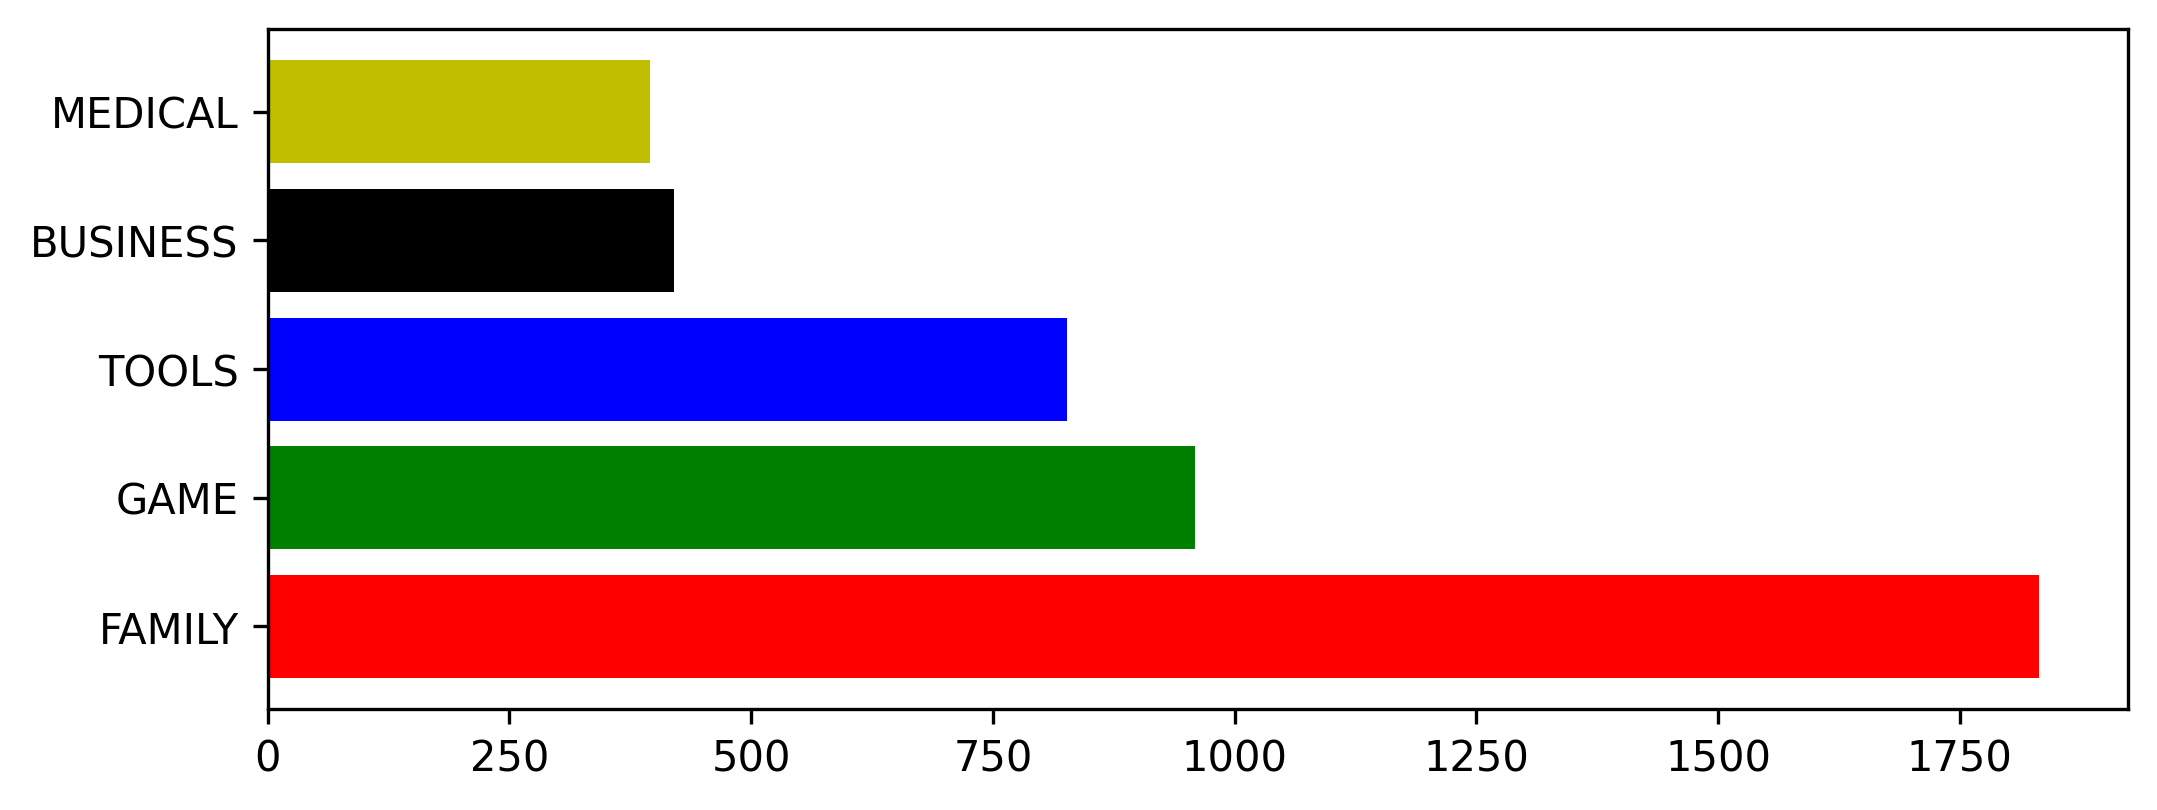

In [74]:
X = cat_order.index
Y = cat_order['App']
my_colors = 'rgbkymc'
# the code below is used for creating figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# the code below is used for creating bar plot
plt.barh(X,Y, color=my_colors)
# the code below is used for saving plot in image.png format
plt.savefig('cat_order.png',bbox_inches="tight") 

**Scatter Plot**

The scatter plot below shows the relationship and the spread of apps on Review vs Rating. There is no clear straight line to indicate a strong relationship between review and rating. However, most of the high ratings (>3.5) are concentrated when there are 3 or less reviews.

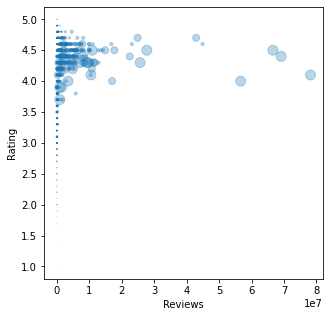

In [38]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # sizes of scatter plot bubbles
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# name for scatter plot, variabel x, and variabel y
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

**Histogram Size Distribution**

The histogram below shows the distribution of sizes of apps in Mb(Megabytes). The  histogram consists of 100 bins. Most apps in Google Play Store are small-sized (>20 Mb). As the sizes get bigger, the number of frequencies starts to decline sharply.

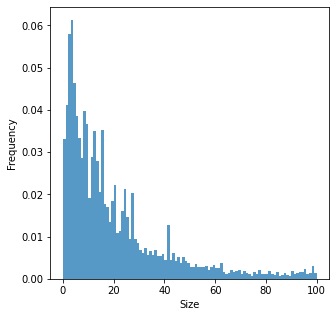

In [39]:
X=(playstore['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

**Bar Chart of Price Comparison Between Categories**

The bar chart below shows the most expensive category of paid apps on average in Google Play Store. The bar chart contains 10 bins so we only select the top 10 most expensive categories of apps in Google Play Store. Based on the chart, there is a huge gap of price between the top 3 category (Finance, Lifestyle, Events) and the rest of the category. 

In [54]:
# Firstly, we have to subset only the paid apps from the table.
paid = playstore[playstore.Type == 'Paid']

<AxesSubplot:xlabel='Category'>

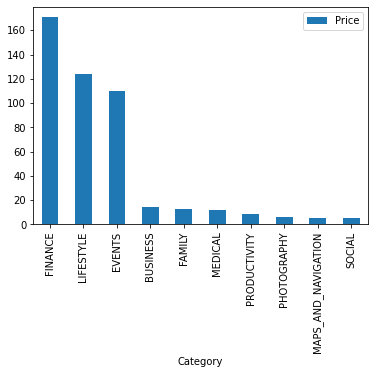

In [52]:
paid.groupby('Category').agg({
    'Price' : 'mean'
}).sort_values('Price', ascending=False).head(10).plot(kind='bar')